In [1]:
import numpy as np
import algorithm_analysis as aa
import cec17.functions as cec
import cec17.functions_info as cec_info
import matplotlib.pyplot as plt
from tabulate import tabulate
import sys
from pathlib import Path
import time

In [13]:
def analyze_function(function_name, dims, population_size=50, runs=10, max_iterations = 1000):
    subdir_name = "analysis_out/" + function_name
    parameters_string = "_D" + str(dims) + '_P' + str(population_size) + '_I' + str(max_iterations) + '_R' + str(runs)
    timestr = time.strftime("%Y%m%d_%H%M%S")
    Path("./" + subdir_name).mkdir(parents=True, exist_ok=True)
    org_stdout = sys.stdout
    txtfilename = subdir_name + '/' + function_name + parameters_string + '_out_' + timestr + '.txt'
    sys.stdout = f = open(txtfilename, 'w')
    
    print('run cauchy')
    results_c, progress_c, populations_c = aa.analyze_algorithm(function_name, 'cauchy', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims)
        
    print('run normal')
    results_n, progress_n, populations_n = aa.analyze_algorithm(function_name, 'normal', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims)
        
    real_min = cec.get_shift_matrix(cec_info.function_number[function_name], dims) * 0.5
    
    best_individual_c = populations_c[np.argmin(np.linalg.norm(populations_c - real_min, axis=1))]
    best_individual_n = populations_n[np.argmin(np.linalg.norm(populations_n - real_min, axis=1))]
    
    print('\n\nSummary')
    print(tabulate([['population size', population_size],
                    ['runs', runs],
                    ['max_iterations', max_iterations]]
                  ))
    
    print('Results')    
    print(tabulate([['min', np.min(results_c), np.min(results_n)],
                    ['max', np.max(results_c), np.max(results_n)],
                    ['mean', np.mean(results_c), np.mean(results_n)],
                    ['median', np.median(results_c), np.median(results_n)],
                    ['std', np.std(results_c), np.std(results_n)]],
                   headers=['', 'cauchy', 'normal']  
                   ))
    
    print('Population')
    print('target individual', real_min)
    if dims == 2:
        print(tabulate([['average individual', np.mean(populations_c, axis=0), np.mean(populations_n, axis=0)],
                        ['best individual', best_individual_c, best_individual_n],
                        ['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                       ))
    else:
        print(tabulate([['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                      ))
    
    mean_progress_c = np.mean(progress_c, axis=0)
    mean_progress_n = np.mean(progress_n, axis=0)
    
    plt.plot(mean_progress_c, label='cauchy')
    plt.plot(mean_progress_n, label='normal')    
    plt.legend()
    plt.savefig(subdir_name + '/' + function_name + parameters_string + '_progress_chart_' + timestr + '.png')
    
    sys.stdout.close()
    sys.stdout = org_stdout
    f.close()
    with open(txtfilename, 'r') as f:
        print(f.read())

run cauchy
epoch: 1	 result: 0.2824876776077758	 duration: 1.17s
epoch: 2	 result: 1.9494777643834027	 duration: 1.10s
run normal
epoch: 1	 result: 0.2907041024535886	 duration: 1.17s
epoch: 2	 result: 0.029644875218977518	 duration: 1.19s


Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
          cauchy     normal
------  --------  ---------
min     0.282488  0.0296449
max     1.94948   0.290704
mean    1.11598   0.160174
median  1.11598   0.160174
std     0.833495  0.13053
Population
target individual [-27.63819925 -35.21477986]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [-27.74508794 -35.17725774]  [-27.45947458 -35.29548908]
best individual           [-27.28940243 -35.37018456]  [-27.51029819 -35.27138229]
average individual error  0.49489749738361904          0.1961063320133356
best

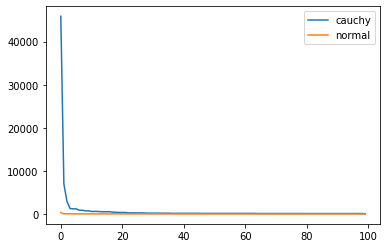

In [14]:
analyze_function('bent_cigar', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.0020952239790403837	 duration: 1.41s
epoch: 2	 result: 0.00014613248492878483	 duration: 1.28s
run normal
epoch: 1	 result: 4.8186927074311825e-05	 duration: 1.31s
epoch: 2	 result: 0.0007849410297353643	 duration: 1.26s


Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
             cauchy       normal
------  -----------  -----------
min     0.000146132  4.81869e-05
max     0.00209522   0.000784941
mean    0.00112068   0.000416564
median  0.00112068   0.000416564
std     0.000974546  0.000368377
Population
target individual [-27.96916335   2.2715327 ]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [-27.95558892   2.25733292]  [-27.95963572   2.28510808]
best individual           [-27.97640029   2.26246347]  [-27.96507211   2.2767754 ]
average individual error  

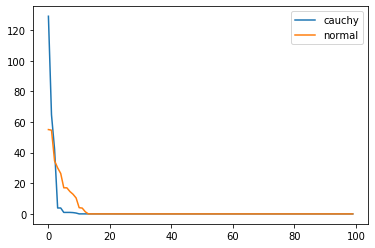

In [15]:
analyze_function('zakharov', dims=2, population_size=50, runs=2, max_iterations = 100)

In [ ]:
analyze_function('rosenbrock', dims=2, population_size=50, runs=2, max_iterations = 100)

In [ ]:
analyze_function('rastrigin', dims=2, population_size=50, runs=2, max_iterations = 100)

In [ ]:
analyze_function('expanded_shaffer_f6', dims=2, population_size=50, runs=2, max_iterations = 100)

In [ ]:
analyze_function('levy', dims=2, population_size=50, runs=2, max_iterations = 100)

In [ ]:
analyze_function('schwefel', dims=2, population_size=50, runs=2, max_iterations = 100)

In [10]:
from cec17.functions import *

In [11]:
modal_function('levy', np.array([[-2.4856254283737513e+01,   9.3425322367542663e-01]]), modify = True, random_modification = False)

array([800.71584455])